# Explore

### Import

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import re
import unicodedata
import nltk
from nltk.tokenize.toktok import ToktokTokenizer
from nltk.corpus import stopwords

from wordcloud import WordCloud

### Exercise

### 1.Spam Data

### a. Load the spam data set.

In [2]:
df = pd.read_csv('spam.csv', encoding='latin-1', usecols=[0,1])
df.columns = ['label','text']
df.head()

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [3]:
labels = pd.concat([df.label.value_counts(),
                    df.label.value_counts(normalize=True)], axis=1)
labels.columns = ['n', 'percent']
labels

,n,percent
ham,4825,0.865937
spam,747,0.134063


### b. Create and explore bigrams for the spam data. Visualize them with a word cloud. How do they compare with the ham bigrams?  

In [4]:
def basic_clean(text):
    text = (unicodedata.normalize('NFKD', text.lower())
            .encode('ascii', 'ignore') # ascii to reduce noise
            .decode('utf-8', 'ignore') # decode using utf-8
           )
    return re.sub(r"[^a-z0-9\s]", '', text)

In [5]:
def tokenize(string):
    '''
    This function takes in a string and returns a tokenized string.
    '''
    # Create tokenizer.
    tokenizer = nltk.tokenize.ToktokTokenizer()
    
    # Use tokenizer
    string = tokenizer.tokenize(string, return_str=True)
    
    return string

In [6]:
def lemmatize(string):
    '''
    This function takes in string for and returns a string with words lemmatized.
    '''
    # Create the lemmatizer.
    wnl = nltk.stem.WordNetLemmatizer()
    
    # Use the lemmatizer on each word in the list of words we created by using split.
    lemmas = [wnl.lemmatize(word) for word in string.split()]
    
    # Join our list of words into a string again and assign to a variable.
    string = ' '.join(lemmas)
    
    return string

In [7]:
def remove_stopwords(string, extra_words=[], exclude_words=[]):
    '''
    This function takes in a string, optional extra_words and exclude_words parameters
    with default empty lists and returns a string.
    '''
    # Create stopword_list.
    stopword_list = stopwords.words('english')
    
    # Remove 'exclude_words' from stopword_list to keep these in my text.
    stopword_list = set(stopword_list) - set(exclude_words)
    # Add in 'extra_words' to stopword_list.
    stopword_list = stopword_list.union(set(extra_words))
    
    # Split words in string.
    words = string.split()
    
    # Create a list of words from my string with stopwords removed and assign to variable.
    filtered_words = [word for word in words if word not in stopword_list]
    
    # Join words in the list back into strings and assign to a variable.
    string_without_stopwords = ' '.join(filtered_words)
    
    return string_without_stopwords


In [8]:
df['text_cleaned'] = df.text.apply(basic_clean)
df['text_tokenized'] = df.text_cleaned.apply(tokenize)
df['text_lemmatized'] = df.text_tokenized.apply(lemmatize)
df['text_filtered'] = df.text_lemmatized.apply(remove_stopwords)
df.head()

,label,text,text_cleaned,text_tokenized,text_lemmatized,text_filtered
0,ham,"Go until jurong point, crazy.. Available only ...",go until jurong point crazy available only in ...,go until jurong point crazy available only in ...,go until jurong point crazy available only in ...,go jurong point crazy available bugis n great ...
1,ham,Ok lar... Joking wif u oni...,ok lar joking wif u oni,ok lar joking wif u oni,ok lar joking wif u oni,ok lar joking wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry in 2 a wkly comp to win fa cup fina...,free entry in 2 a wkly comp to win fa cup fina...,free entry in 2 a wkly comp to win fa cup fina...,free entry 2 wkly comp win fa cup final tkts 2...
3,ham,U dun say so early hor... U c already then say...,u dun say so early hor u c already then say,u dun say so early hor u c already then say,u dun say so early hor u c already then say,u dun say early hor u c already say
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah i dont think he goes to usf he lives aroun...,nah i dont think he goes to usf he lives aroun...,nah i dont think he go to usf he life around h...,nah dont think go usf life around though


In [9]:
# (a|b)
words = [re.sub(r'([^a-z0-9\s]|\s.\s)', '', doc).split() for doc in df.text_filtered]
# words 

# column name will be words, and the column will contain lists of the words in each doc
df = pd.concat([df, pd.DataFrame({'words': words})], axis=1)

df.head()

,label,text,text_cleaned,text_tokenized,text_lemmatized,text_filtered,words
0,ham,"Go until jurong point, crazy.. Available only ...",go until jurong point crazy available only in ...,go until jurong point crazy available only in ...,go until jurong point crazy available only in ...,go jurong point crazy available bugis n great ...,"[go, jurong, point, crazy, available, bugisgre..."
1,ham,Ok lar... Joking wif u oni...,ok lar joking wif u oni,ok lar joking wif u oni,ok lar joking wif u oni,ok lar joking wif u oni,"[ok, lar, joking, wifoni]"
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry in 2 a wkly comp to win fa cup fina...,free entry in 2 a wkly comp to win fa cup fina...,free entry in 2 a wkly comp to win fa cup fina...,free entry 2 wkly comp win fa cup final tkts 2...,"[free, entrywkly, comp, win, fa, cup, final, t..."
3,ham,U dun say so early hor... U c already then say...,u dun say so early hor u c already then say,u dun say so early hor u c already then say,u dun say so early hor u c already then say,u dun say early hor u c already say,"[u, dun, say, early, horc, already, say]"
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah i dont think he goes to usf he lives aroun...,nah i dont think he goes to usf he lives aroun...,nah i dont think he go to usf he life around h...,nah dont think go usf life around though,"[nah, dont, think, go, usf, life, around, though]"


In [10]:
ham_words = ' '.join(df[df.label=='ham'].text_filtered)
spam_words = ' '.join(df[df.label=='spam'].text_filtered)
all_words = ' '.join(df.text_filtered)

ham_words = re.sub(r'\s.\s', '', ham_words)
spam_words = re.sub(r'\s.\s', '', spam_words)
all_words = re.sub(r'\s.\s', '', all_words)

In [11]:
ham_freq = pd.Series(ham_words.split()).value_counts()
spam_freq = pd.Series(spam_words.split()).value_counts()
all_freq = pd.Series(all_words.split()).value_counts()

all_freq.head()

call    551
im      450
get     351
ur      343
dont    257
dtype: int64

In [12]:
word_counts = (pd.concat([all_freq, ham_freq, spam_freq], axis=1, sort=True)
               .set_axis(['all', 'ham', 'spam'], axis=1, inplace=False)
               .fillna(0)
               .apply(lambda s: s.astype(int))
              )

word_counts.head()

,all,ham,spam
008704050406,2,0,2
0089my,1,0,1
0121,1,0,1
01223585236,1,0,1
01223585334,2,0,2


In [13]:
word_counts.sort_values(by='all', ascending=False).head(10)

,all,ham,spam
call,551,209,342
im,450,436,13
get,351,278,73
ur,343,220,125
dont,257,237,19
ok,250,245,5
ltgt,248,248,0
go,246,218,27
free,240,49,191
know,227,214,13


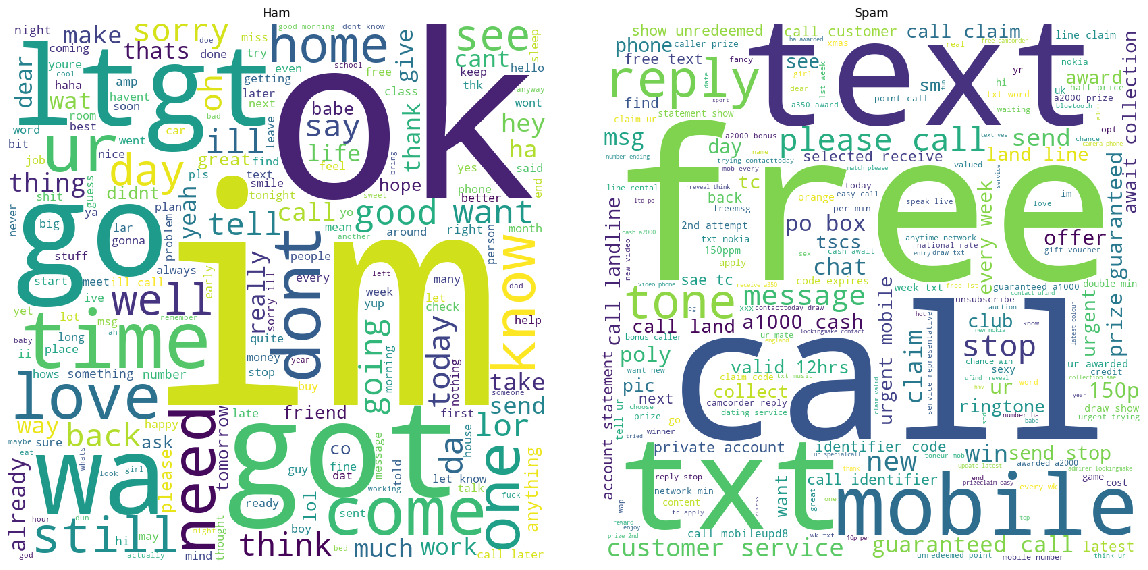

In [14]:
ham_cloud = WordCloud(background_color='white',
                      height=800, width=800).generate(ham_words)

spam_cloud = WordCloud(background_color='white', 
                      height=800, width=800).generate(spam_words)

plt.figure(figsize=(15,15))
axs = [plt.axes([.25, 1, .5, .5]), plt.axes([.8, 1, .5, .5])]

# imshow => display data as an image
axs[0].imshow(ham_cloud)
axs[1].imshow(spam_cloud)

axs[0].set_title('Ham')
axs[1].set_title('Spam')

for ax in axs: ax.axis('off')

In [15]:
df['bigrams'] = [list(nltk.ngrams(wordlist, 2)) for wordlist in df.words]
df.head()

,label,text,text_cleaned,text_tokenized,text_lemmatized,text_filtered,words,bigrams
0,ham,"Go until jurong point, crazy.. Available only ...",go until jurong point crazy available only in ...,go until jurong point crazy available only in ...,go until jurong point crazy available only in ...,go jurong point crazy available bugis n great ...,"[go, jurong, point, crazy, available, bugisgre...","[(go, jurong), (jurong, point), (point, crazy)..."
1,ham,Ok lar... Joking wif u oni...,ok lar joking wif u oni,ok lar joking wif u oni,ok lar joking wif u oni,ok lar joking wif u oni,"[ok, lar, joking, wifoni]","[(ok, lar), (lar, joking), (joking, wifoni)]"
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry in 2 a wkly comp to win fa cup fina...,free entry in 2 a wkly comp to win fa cup fina...,free entry in 2 a wkly comp to win fa cup fina...,free entry 2 wkly comp win fa cup final tkts 2...,"[free, entrywkly, comp, win, fa, cup, final, t...","[(free, entrywkly), (entrywkly, comp), (comp, ..."
3,ham,U dun say so early hor... U c already then say...,u dun say so early hor u c already then say,u dun say so early hor u c already then say,u dun say so early hor u c already then say,u dun say early hor u c already say,"[u, dun, say, early, horc, already, say]","[(u, dun), (dun, say), (say, early), (early, h..."
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah i dont think he goes to usf he lives aroun...,nah i dont think he goes to usf he lives aroun...,nah i dont think he go to usf he life around h...,nah dont think go usf life around though,"[nah, dont, think, go, usf, life, around, though]","[(nah, dont), (dont, think), (think, go), (go,..."


In [16]:
ham_bigrams = pd.Series(list(nltk.ngrams(ham_words.split(), 2))).value_counts().head(20)
spam_bigrams = pd.Series(list(nltk.ngrams(spam_words.split(), 2))).value_counts().head(20)

In [17]:
ham_bigrams

(call, later)      47
(ill, call)        45
(let, know)        41
(sorry, ill)       39
(good, morning)    31
(dont, know)       31
(new, year)        26
(pls, send)        22
(take, care)       21
(im, going)        20
(ok, lor)          20
(good, night)      19
(ltgt, min)        19
(im, gonna)        19
(last, night)      18
(hi, hi)           18
(great, day)       17
(happy, new)       15
(like, ltgt)       14
(send, message)    14
dtype: int64

In [18]:
spam_bigrams

(please, call)          43
(customer, service)     27
(guaranteed, call)      23
(po, box)               23
(prize, guaranteed)     22
(a1000, cash)           20
(send, stop)            19
(every, week)           19
(land, line)            18
(urgent, mobile)        18
(await, collection)     18
(valid, 12hrs)          17
(account, statement)    16
(sae, tc)               16
(claim, call)           16
(reply, call)           15
(identifier, code)      15
(selected, receive)     15
(call, customer)        15
(call, 08000930705)     15
dtype: int64

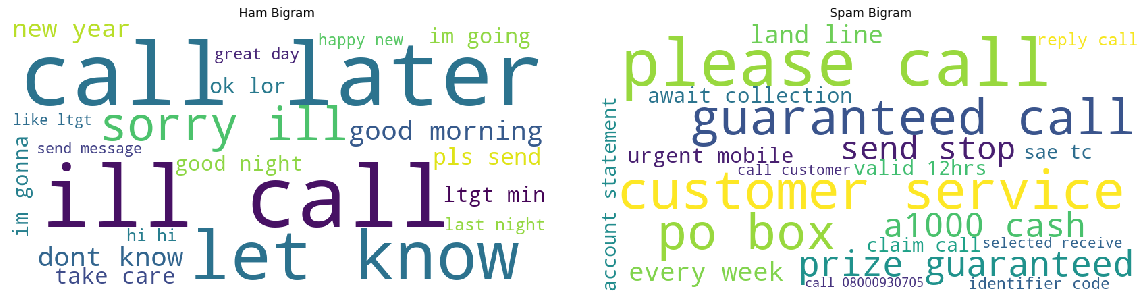

In [19]:
ham_data = {k[0] + ' ' + k[1]: v for k, v in ham_bigrams.to_dict().items()}
spam_data = {k[0] + ' ' + k[1]: v for k, v in spam_bigrams.to_dict().items()}

ham_bigram_cloud = WordCloud(background_color='white', 
                width=800, height=400).generate_from_frequencies(ham_data)

spam_bigram_cloud = WordCloud(background_color='white', 
                width=800, height=400).generate_from_frequencies(spam_data)


plt.figure(figsize=(15,15))
axs = [plt.axes([.25, 1, .5, .5]), plt.axes([.8, 1, .5, .5])]

axs[0].imshow(ham_bigram_cloud)
axs[1].imshow(spam_bigram_cloud)

axs[0].set_title('Ham Bigram')
axs[1].set_title('Spam Bigram')

for ax in axs: ax.axis('off')

### c. Is there any overlap in the bigrams for the spam data and the ham data?    

Not really

### d. Create and explore with trigrams (i.e. a n-gram with an n of 3) for both the spam and ham data.

In [20]:
df['trigrams'] = [list(nltk.ngrams(wordlist, 3)) for wordlist in df.words]
df.head()

,label,text,text_cleaned,text_tokenized,text_lemmatized,text_filtered,words,bigrams,trigrams
0,ham,"Go until jurong point, crazy.. Available only ...",go until jurong point crazy available only in ...,go until jurong point crazy available only in ...,go until jurong point crazy available only in ...,go jurong point crazy available bugis n great ...,"[go, jurong, point, crazy, available, bugisgre...","[(go, jurong), (jurong, point), (point, crazy)...","[(go, jurong, point), (jurong, point, crazy), ..."
1,ham,Ok lar... Joking wif u oni...,ok lar joking wif u oni,ok lar joking wif u oni,ok lar joking wif u oni,ok lar joking wif u oni,"[ok, lar, joking, wifoni]","[(ok, lar), (lar, joking), (joking, wifoni)]","[(ok, lar, joking), (lar, joking, wifoni)]"
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry in 2 a wkly comp to win fa cup fina...,free entry in 2 a wkly comp to win fa cup fina...,free entry in 2 a wkly comp to win fa cup fina...,free entry 2 wkly comp win fa cup final tkts 2...,"[free, entrywkly, comp, win, fa, cup, final, t...","[(free, entrywkly), (entrywkly, comp), (comp, ...","[(free, entrywkly, comp), (entrywkly, comp, wi..."
3,ham,U dun say so early hor... U c already then say...,u dun say so early hor u c already then say,u dun say so early hor u c already then say,u dun say so early hor u c already then say,u dun say early hor u c already say,"[u, dun, say, early, horc, already, say]","[(u, dun), (dun, say), (say, early), (early, h...","[(u, dun, say), (dun, say, early), (say, early..."
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah i dont think he goes to usf he lives aroun...,nah i dont think he goes to usf he lives aroun...,nah i dont think he go to usf he life around h...,nah dont think go usf life around though,"[nah, dont, think, go, usf, life, around, though]","[(nah, dont), (dont, think), (think, go), (go,...","[(nah, dont, think), (dont, think, go), (think..."


In [21]:
ham_trigrams = pd.Series(list(nltk.ngrams(ham_words.split(), 3))).value_counts().head(20)
spam_trigrams = pd.Series(list(nltk.ngrams(spam_words.split(), 3))).value_counts().head(20)

In [22]:
ham_trigrams

(sorry, ill, call)                 38
(ill, call, later)                 38
(happy, new, year)                 13
(pls, send, message)               12
(pick, phone, right)               12
(phone, right, pls)                12
(cant, pick, phone)                12
(right, pls, send)                 12
(hi, hi, hi)                       11
(good, morning, dear)               7
(pls, convey, birthday)             6
(kiss, across, sea)                 6
(convey, birthday, wish)            6
(call, later, meeting)              5
(cameminuts, latr, wid)             5
(cabin, pa, said)                   5
(ok, sed, sexy)                     5
(bedroom, minute, ok)               5
(happy, bday, bos)                  5
(callertune, caller, presscopy)     5
dtype: int64

In [23]:
spam_trigrams

(prize, guaranteed, call)              21
(call, customer, service)              15
(land, line, claim)                    14
(2003, account, statement)             13
(private, 2003, account)               13
(reply, call, 08000930705)             13
(show, 800, unredeemed)                12
(camcorder, reply, call)               12
(guaranteed, a1000, cash)              12
(bonus, caller, prize)                 11
(every, week, txt)                     11
(anytime, network, min)                11
(please, call, customer)               10
(cash, await, collection)              10
(customer, service, representative)    10
(a2000, bonus, caller)                 10
(trying, contacttoday, draw)            9
(750, anytime, network)                 9
(mob, every, week)                      9
(draw, txt, music)                      9
dtype: int64

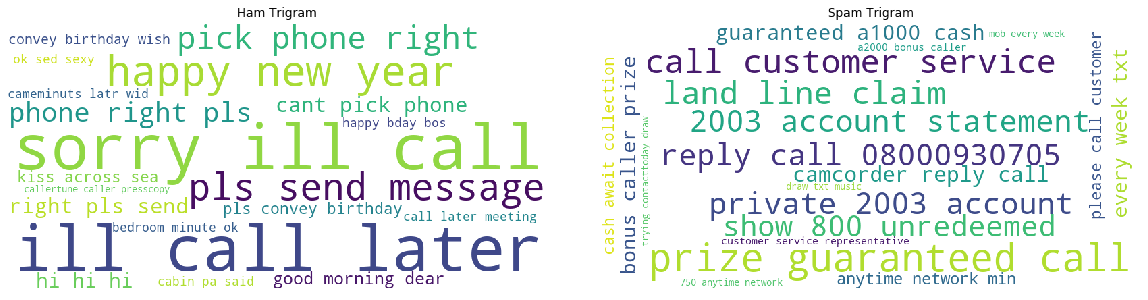

In [24]:
ham_tridata = {k[0] + ' ' + k[1]+ ' ' + k[2]: v for k, v in ham_trigrams.to_dict().items()}
spam_tridata = {k[0] + ' ' + k[1]+ ' ' + k[2]: v for k, v in spam_trigrams.to_dict().items()}

ham_trigram_cloud = WordCloud(background_color='white', 
                width=800, height=400).generate_from_frequencies(ham_tridata)

spam_trigram_cloud = WordCloud(background_color='white', 
                width=800, height=400).generate_from_frequencies(spam_tridata)


plt.figure(figsize=(15,15))
axs = [plt.axes([.25, 1, .5, .5]), plt.axes([.8, 1, .5, .5])]

axs[0].imshow(ham_trigram_cloud)
axs[1].imshow(spam_trigram_cloud)

axs[0].set_title('Ham Trigram')
axs[1].set_title('Spam Trigram')

for ax in axs: ax.axis('off')

### 2. Explore the blog articles using the techniques discussed in the exploration lesson.

In [34]:
import acquire
import prepare

from requests import get
from bs4 import BeautifulSoup
import os

In [35]:
url = 'https://codeup.com/codeups-data-science-career-accelerator-is-here/'
headers = {'User-Agent': 'Codeup Data Science'} # Some websites don't accept the pyhon-requests default user-agent
response = get(url, headers=headers)

In [ ]:
df = pd.read_csv('spam.csv', encoding='latin-1', usecols=[0,1])
df.columns = ['label','text']
df.head()

### 3. Explore the news articles using the techniques discussed in the exploration lesson. Use the category variable when exploring.